https://www.biorxiv.org/content/10.1101/639377v1.full.pdf  
Needlestack estimates for each candidate alteration, i.e. each pair of position and base change (the
three non-reference nucleotides and each observed insertions and deletions) the systematic
sequencing error rate across a series of samples, typically more than twenty to ensure a reasonable
estimation of this metric. Then, for each sample, it computes the p-value for the observed reads under
the null hypothesis of this estimated model of errors, and transforms this p-value into a Phred-scale
Q-value reported as a variant quality score (QVAL) for the candidate mutation. As such it measures
the evidence that the observed mutation is not explained by the error model, and should therefore be
considered a mutation

In [1]:
vcf = "/data/Mito_Trace/output/somatic_variants/CHIP_dec172021/aggregate/variants.all.vcf"
drop_nonchr = True

In [2]:
import pandas as pd
from src.utils.data_io import read_csv_multichar
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

fig_utils from mplh


In [3]:
vcf_df = read_csv_multichar(vcf, multicomment="##", sep="\t", verbose=True)

ic| f'skipping {curr} rows': 'skipping 240 rows'


In [4]:
vcf_df.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'CHIP_b1_Control', 'CHIP_b1_Flt3l', 'CHIP_b1_Input', 'CHIP_b2_Control',
       'CHIP_b2_Flt3l', 'CHIP_b2_Input', 'CHIP_b3_Control', 'CHIP_b3_Flt3l',
       'CHIP_b3_Input', 'CHIP_b4_Control', 'CHIP_b4_Flt3l', 'CHIP_b4_Input'],
      dtype='object')

In [5]:
if drop_nonchr:
    vcf_df = vcf_df[vcf_df["#CHROM"].str.contains("^chr")]

In [6]:
vcf_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHIP_b1_Control,...,CHIP_b1_Input,CHIP_b2_Control,CHIP_b2_Flt3l,CHIP_b2_Input,CHIP_b3_Control,CHIP_b3_Flt3l,CHIP_b3_Input,CHIP_b4_Control,CHIP_b4_Flt3l,CHIP_b4_Input
1000,chr1,10018,.,C,G,97.47380,.,TYPE=snv;NS=12;AF=0.08333333;DP=4744;RO=4722;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.2387064:681:678:1:0.001468429:402,276,1,...",...,"0/1:97.4738:1249:1237:12:0.009607686:740,497,7...","0/0:0:234:233:0:0:113,120,0,0:-1:-1:0:944.2852:.","0/0:0:225:225:0:0:113,112,0,0:-1:-1:0:926.5604:.","0/0:0:343:343:0:0:176,167,0,0:-1:-1:0:1432.95:.","0/0:16.98098:186:184:2:0.01075269:100,84,0,2:9...","0/0:0:269:269:0:0:130,139,0,0:-1:-1:0:1116.99:.","0/0:0:108:108:0:0:53,55,0,0:-1:-1:0:416.3386:.","0/0:21.71786:356:353:3:0.008426966:162,191,2,1...","0/0:0:315:314:0:0:160,154,0,0:-1:-1:0:1305.324:.","0/0:0:118:118:0:0:67,51,0,0:-1:-1:0:458.7915:."
1001,chr1,10031,.,T,TA,65.50475,.,TYPE=ins;NS=12;AF=0.08333333;DP=6095;RO=6077;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:65.50475:856:853:5:0.005841121:532,321,3,2...",...,"0/0:0:1640:1639:0:0:1029,610,0,0:-1:-1:0:Inf:.","0/0:0:315:315:0:0:163,152,0,0:-1:-1:0:1790.363:.","0/0:0:286:286:0:0:146,140,0,0:-1:-1:0:1616.495:.","0/0:0:432:431:0:0:237,194,0,0:-1:-1:0:2483.383:.","0/0:0:245:245:0:0:141,104,0,0:-1:-1:0:1386.389:.","0/0:0:357:357:0:0:189,168,0,0:-1:-1:0:2052.156:.","0/0:0:141:141:0:0:70,71,0,0:-1:-1:0:744.5862:.","0/0:0:446:444:0:0:230,214,0,0:-1:-1:0:2570.377:.","0/0:0:381:379:0:0:208,171,0,0:-1:-1:0:2196.873:.","0/0:0:154:153:0:0:94,59,0,0:-1:-1:0:833.2017:."
1002,chr1,10039,.,AC,A,87.23672,.,TYPE=del;NS=12;AF=0.08333333;DP=6678;RO=6620;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:946:939:0:0:633,306,0,0:-1:-1:0:Inf:.",...,"0/1:87.23672:1822:1808:8:0.004390779:1257,551,...","0/0:0:341:340:0:0:195,145,0,0:-1:-1:0:1873.462:.","0/0:0:308:306:0:0:178,128,0,0:-1:-1:0:1679.652:.","0/0:0:472:470:0:0:277,193,0,0:-1:-1:0:2615.803:.","0/0:0:259:259:0:0:168,91,0,0:-1:-1:0:1403.992:.","0/0:22.05355:368:361:2:0.005434783:218,143,0,2...","0/0:0:161:160:0:0:94,66,0,0:-1:-1:0:819.4477:.","0/0:21.33713:492:489:2:0.004065041:288,201,2,0...","0/0:0:422:422:0:0:251,171,0,0:-1:-1:0:2310.822:.","0/0:0:176:174:0:0:124,50,0,0:-1:-1:0:933.9806:."
1003,chr1,10051,.,A,ACCG,67.72425,.,TYPE=ins;NS=12;AF=0.08333333;DP=7730;RO=7680;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:1123:1117:0:0:754,363,0,0:-1:-1:0:Inf:.",...,"0/1:67.72425:2162:2147:6:0.002775208:1497,650,...","0/0:0:384:382:0:0:230,152,0,0:-1:-1:0:2286.389:.","0/0:0:348:348:0:0:212,136,0,0:-1:-1:0:2077.343:.","0/0:0:535:532:0:0:317,215,0,0:-1:-1:0:Inf:.","0/0:0:293:291:0:0:191,100,0,0:-1:-1:0:1747.041:.","0/0:0:419:416:0:0:272,144,0,0:-1:-1:0:2530.343:.","0/0:0:190:190:0:0:113,77,0,0:-1:-1:0:1078.799:.","0/0:0:562:561:0:0:346,215,0,0:-1:-1:0:Inf:.","0/0:0:456:456:0:0:289,167,0,0:-1:-1:0:2738.056:.","0/0:0:208:206:0:0:137,69,0,0:-1:-1:0:1201.061:."
1004,chr1,10055,.,TA,T,60.01402,.,TYPE=del;NS=12;AF=0.1666667;DP=7734;RO=7677;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:60.01402:1122:1113:9:0.00802139:707,406,4,...",...,"0/0:0:2135:2124:1:0.0004683841:1442,682,1,0:99...","0/0:0:389:388:0:0:236,152,0,0:-1:-1:0:1570.522:.","0/0:0:352:352:0:0:216,136,0,0:-1:-1:0:1430.16:.","0/0:0.5660855:535:535:1:0.001869159:314,221,0,...","0/0:0:295:294:0:0:196,98,0,0:-1:-1:0:1183.517:.","0/0:0.5660855:422:421:1:0.002369668:270,151,0,...","0/0:0:189:186:0:0:107,79,0,0:-1:-1:0:730.9136:.","0/0:0:557:555:0:0:335,220,0,0:-1:-1:0:2283.826:.","0/0:0:451:449:0:0:288,161,0,0:-1:-1:0:1836.398:.","0/0:0:198:197:0:0:128,69,0,0:-1:-1:0:772.6831:."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,chrY,56767254,.,T,A,56.78491,.,TYPE=snv;NS=12;AF=0.08333333;DP=1759;RO=1744;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:20.33698:408:405:3:0.007352941:277,128,0,3...",...,"0/0:0:380:380:0:0:252,128,0,0:-1:-1:0

In [7]:
def split_info(info, param_sep="=", sep=";"):
    params = info.split(sep)
    params_d = {}
    for p in params:
        nm, val = p.split(param_sep)
        try:
            params_d[nm] = float(val)
        except ValueError:
            params_d[nm] = val
    return pd.Series(params_d)
    
vcf_df = pd.concat((vcf_df,vcf_df["INFO"].apply(split_info)), axis=1)
vcf_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHIP_b1_Control,...,SRR,SAF,SAR,SOR,RVSB,FS,ERR,SIG,CONT,WARN
1000,chr1,10018,.,C,G,97.47380,.,TYPE=snv;NS=12;AF=0.08333333;DP=4744;RO=4722;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.2387064:681:678:1:0.001468429:402,276,1,...",...,2122.0,10.0,8.0,0.713338,0.504979,0.000000,0.000557,0.001,ACCxTAA,NaN
1001,chr1,10031,.,T,TA,65.50475,.,TYPE=ins;NS=12;AF=0.08333333;DP=6095;RO=6077;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:65.50475:856:853:5:0.005841121:532,321,3,2...",...,2538.0,5.0,2.0,1.438511,0.641803,1.508307,0.000092,0.001,CCTxAAC,NaN
1002,chr1,10039,.,AC,A,87.23672,.,TYPE=del;NS=12;AF=0.08333333;DP=6678;RO=6620;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:946:939:0:0:633,306,0,0:-1:-1:0:Inf:.",...,2349.0,8.0,4.0,0.792969,0.523762,0.000000,0.000126,0.001,TAAxCCT,NaN
1003,chr1,10051,.,A,ACCG,67.72425,.,TYPE=ins;NS=12;AF=0.08333333;DP=7730;RO=7680;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:1123:1117:0:0:754,363,0,0:-1:-1:0:Inf:.",...,2630.0,6.0,0.0,99.000000,1.000000,9.955623,0.000069,0.001,TAAxCCC,NaN
1004,chr1,10055,.,TA,T,60.01402,.,TYPE=del;NS=12;AF=0.1666667;DP=7734;RO=7677;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:60.01402:1122:1113:9:0.00802139:707,406,4,...",...,2749.0,9.0,11.0,0.590563,0.686154,10.000090,0.000647,0.001,CCTxACC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,chrY,56767254,.,T,A,56.78491,.,TYPE=snv;NS=12;AF=0.08333333;DP=1759;RO=1744;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:20.33698:408:405:3:0.007352941:277,128,0,3...",...,631.0,9.0,3.0,1.359116,0.628968,2.567563,0.000627,0.001,CATxGGA,NaN
6201,chrY,56768565,.,G,A,51.13507,.,TYPE=snv;NS=12;AF=0.08333333;DP=3111;RO=3102;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:829:828:0:0:551,277,0,0:-1:-1:0:Inf:.",...,1088.0,4.0,1.0,1.735079,0.683401,1.784035,0.000096,0.001,ATCxAAC,NaN
6202,chrY,56768763,.,T,A,67.89379,.,TYPE=snv;NS=12;AF=0.08333333;DP=1164;RO=1144;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:265:264:0:0:80,184,0,0:-1:-1:0:1241.999:.",...,785.0,3.0,3.0,0.189914,0.685217,4.133454,0.000290,0.001,GAAxGGA,NaN
6203,chrY,56768805,.,C,T,77.00362,.,TYPE=snv;NS=12;AF=0.08333333;DP=1131;RO=1125;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:269:269:0:0:67,202,0,0:-1:-1:0:1316.794:.",...,850.0,2.0,3.0,0.211484,0.672448,2.209067,0.000233,0.001,CAGxCAC,NaN


In [8]:
vcf_df[vcf_df["#CHROM"] == "chrM"]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHIP_b1_Control,...,SRR,SAF,SAR,SOR,RVSB,FS,ERR,SIG,CONT,WARN
5431,chrM,73,.,A,G,816.06210,.,TYPE=snv;NS=12;AF=0.25;DP=100878;RO=2009;AO=98...,GT:QVAL_INV:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_mi...,"1/1:0.913963:10598:7:10590:0.9992451:5,2,7389,...",...,474.0,71062.0,27794.0,0.484475,0.501115,52.087490,0.001341,0.739304,GGTxTGC,INV_REF
5432,chrM,91,.,C,T,54.59722,.,TYPE=snv;NS=12;AF=0.08333333;DP=118142;RO=1180...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.3338782:12362:12359:3:0.0002426792:8222,...",...,36839.0,36.0,23.0,0.408036,0.584809,6.842454,0.000377,0.003520,TTGxGAG,NaN
5433,chrM,114,.,C,T,65.05240,.,TYPE=snv;NS=12;AF=0.08333333;DP=126411;RO=1262...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:13104:13088:2:0.0001526252:8172,4916,1,1...",...,45031.0,38.0,11.0,1.541614,0.657047,12.702980,0.000274,0.001000,ACCxTAT,NaN
5434,chrM,182,.,C,T,429.05070,.,TYPE=snv;NS=12;AF=0.25;DP=136088;RO=135495;AO=...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.7965469:13868:13853:14:0.001009518:7981,...",...,51939.0,414.0,166.0,1.224759,0.607468,59.146990,0.001092,0.272422,TTAxAGG,NaN
5435,chrM,185,.,G,A,75.39784,.,TYPE=snv;NS=12;AF=0.08333333;DP=136891;RO=1368...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:14048:14047:1:0.00007118451:7945,6102,1,...",...,53836.0,15.0,8.0,0.907672,0.548719,0.801183,0.000093,0.001000,CAGxCGA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,chrM,16354,.,C,T,1000.00000,.,TYPE=snv;NS=12;AF=0.25;DP=173705;RO=172711;AO=...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.3839303:17518:17509:2:0.0001141683:7768,...",...,96824.0,408.0,521.0,0.693981,0.500207,0.000000,0.000231,0.426667,ATCxCTT,NaN
6090,chrM,16387,.,A,AT,55.22885,.,TYPE=ins;NS=12;AF=0.08333333;DP=162868;RO=1627...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:16290:16286:0:0:7084,9202,0,0:-1:-1:0:Inf:.",...,91310.0,2.0,1.0,1.528676,0.718815,2.324876,0.000002,0.001000,ATAxGGG,NaN
6091,chrM,16390,.,G,A,1000.00000,.,TYPE=snv;NS=12;AF=0.25;DP=164466;RO=163466;AO=...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.1150018:16289:16280:2:0.0001227822:7044,...",...,93257.0,371.0,546.0,0.800929,0.525470,8.785224,0.000447,0.119986,AGGxGTC,NaN
6092,chrM,16400,.,C,T,1000.00000,.,TYPE=snv;NS=12;AF=0.25;DP=161687;RO=157529;AO=...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.5027961:16160:16157:3:0.0001856436:7051,...",...,89894.0,1680.0,2465.0,0.796921,0.524075,26.906960,0.000640,0.440996,TGAxCAC,NaN


In [25]:
vcf_df.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'CHIP_b1_Control', 'CHIP_b1_Flt3l', 'CHIP_b1_Input', 'CHIP_b2_Control',
       'CHIP_b2_Flt3l', 'CHIP_b2_Input', 'CHIP_b3_Control', 'CHIP_b3_Flt3l',
       'CHIP_b3_Input', 'CHIP_b4_Control', 'CHIP_b4_Flt3l', 'CHIP_b4_Input',
       'TYPE', 'NS', 'AF', 'DP', 'RO', 'AO', 'SRF', 'SRR', 'SAF', 'SAR', 'SOR',
       'RVSB', 'FS', 'ERR', 'SIG', 'CONT', 'WARN', 'log10_DP'],
      dtype='object')

Text(0.5, 1.0, 'Variant Quality')

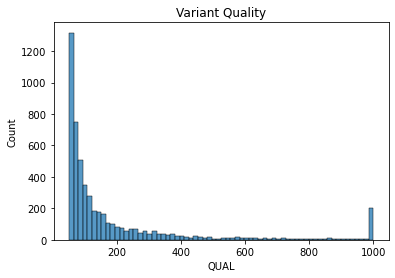

In [9]:
sns.histplot(vcf_df["QUAL"])
plt.title("Variant Quality")

Text(0.5, 1.0, 'Variant Quality without MT')

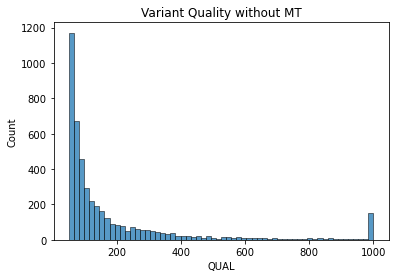

In [10]:
sns.histplot(vcf_df[(~vcf_df["#CHROM"].str.contains("chrM"))]["QUAL"])
plt.title("Variant Quality without MT")

In [11]:
vcf_df[(vcf_df["QUAL"]==1000) & (~vcf_df["#CHROM"].str.contains("chrM"))]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHIP_b1_Control,...,SRR,SAF,SAR,SOR,RVSB,FS,ERR,SIG,CONT,WARN
1055,chr1,11908266,.,A,G,1000.0,.,TYPE=snv;NS=12;AF=0.1666667;DP=1382;RO=1337;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:355:355:0:0:179,176,0,0:-1:-1:0:1959.118:.",...,657.0,17.0,28.0,1.293713,0.626296,10.183160,0.000112,0.001,AGCxGGG,NaN
1122,chr1,16904916,.,G,A,1000.0,.,TYPE=snv;NS=12;AF=0.08333333;DP=1506;RO=1458;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:267:267:0:0:165,102,0,0:-1:-1:0:1343.734:.",...,633.0,29.0,19.0,0.863513,0.538168,1.814776,0.000183,0.001,GGCxGAA,NaN
1135,chr1,27725677,.,G,C,1000.0,.,TYPE=snv;NS=12;AF=0.08333333;DP=1520;RO=1447;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:307:307:0:0:187,120,0,0:-1:-1:0:1702.635:.",...,615.0,40.0,32.0,0.617203,0.518816,0.929559,0.000116,0.001,GGAxAGG,NaN
1188,chr1,88684080,.,G,C,1000.0,.,TYPE=snv;NS=12;AF=0.08333333;DP=1847;RO=1772;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:283:283:0:0:158,125,0,0:-1:-1:0:1072.414:.",...,878.0,36.0,38.0,0.731754,0.517302,0.899938,0.000873,0.001,GCTxCCC,NaN
1460,chr1,143972228,.,T,C,1000.0,.,TYPE=snv;NS=12;AF=0.1666667;DP=3237;RO=3190;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:591:591:0:0:280,311,0,0:-1:-1:0:Inf:.",...,1652.0,20.0,25.0,0.856240,0.537315,1.841379,0.000061,0.001,TGCxTTA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5359,chr21,23968868,.,CT,C,1000.0,.,TYPE=del;NS=12;AF=0.1666667;DP=1132;RO=1083;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:117:117:0:0:88,29,0,0:-1:-1:0:582.6625:.",...,344.0,29.0,17.0,0.488923,0.554984,2.851133,0.000110,0.001,CCCxGTG,NaN
5370,chr21,37366521,.,T,G,1000.0,.,TYPE=snv;NS=12;AF=0.1666667;DP=768;RO=635;AO=4...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:118:118:0:0:62,56,0,0:-1:-1:0:563.882:.",...,292.0,27.0,14.0,1.307132,0.614641,8.276788,0.000186,0.001,TCCxCTC,NaN
5398,chr22,19479774,.,C,G,1000.0,.,TYPE=snv;NS=12;AF=0.1666667;DP=1389;RO=1328;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:335:335:0:0:141,194,0,0:-1:-1:0:1814.119:.",...,700.0,42.0,18.0,1.832471,0.714326,30.863020,0.000126,0.001,TTTxTGG,NaN
5405,chr22,36529335,.,C,T,1000.0,.,TYPE=snv;NS=12;AF=0.08333333;DP=1551;RO=1483;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:380:380:0:0:171,209,0,0:-1:-1:0:2112.756:.",...,795.0,32.0,36.0,0.666735,0.506398,0.000000,0.000119,0.001,GCGxCGA,NaN


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variants per chromosome')

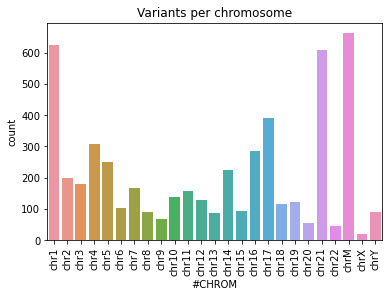

In [12]:
sns.countplot(vcf_df["#CHROM"])
plt.xticks(rotation=90);
plt.title("Variants per chromosome")

## Quality=1000

In [13]:
vcf_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CHIP_b1_Control,...,SRR,SAF,SAR,SOR,RVSB,FS,ERR,SIG,CONT,WARN
1000,chr1,10018,.,C,G,97.47380,.,TYPE=snv;NS=12;AF=0.08333333;DP=4744;RO=4722;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0.2387064:681:678:1:0.001468429:402,276,1,...",...,2122.0,10.0,8.0,0.713338,0.504979,0.000000,0.000557,0.001,ACCxTAA,NaN
1001,chr1,10031,.,T,TA,65.50475,.,TYPE=ins;NS=12;AF=0.08333333;DP=6095;RO=6077;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:65.50475:856:853:5:0.005841121:532,321,3,2...",...,2538.0,5.0,2.0,1.438511,0.641803,1.508307,0.000092,0.001,CCTxAAC,NaN
1002,chr1,10039,.,AC,A,87.23672,.,TYPE=del;NS=12;AF=0.08333333;DP=6678;RO=6620;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:946:939:0:0:633,306,0,0:-1:-1:0:Inf:.",...,2349.0,8.0,4.0,0.792969,0.523762,0.000000,0.000126,0.001,TAAxCCT,NaN
1003,chr1,10051,.,A,ACCG,67.72425,.,TYPE=ins;NS=12;AF=0.08333333;DP=7730;RO=7680;A...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/0:0:1123:1117:0:0:754,363,0,0:-1:-1:0:Inf:.",...,2630.0,6.0,0.0,99.000000,1.000000,9.955623,0.000069,0.001,TAAxCCC,NaN
1004,chr1,10055,.,TA,T,60.01402,.,TYPE=del;NS=12;AF=0.1666667;DP=7734;RO=7677;AO...,GT:QVAL:DP:RO:AO:AF:SB:SOR:RVSB:FS:QVAL_minAF:...,"0/1:60.01402:1122:1113:9:0.00802139:707,406,4,...",...,2749.0,9.0,11.0,0.590563,0.686154,10.000090,0.000647,0.001,CCTxACC,NaN


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variants with QUAL=100')

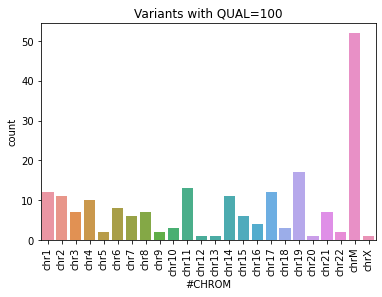

In [14]:
sns.countplot(vcf_df[vcf_df["QUAL"]==1000]["#CHROM"])
plt.xticks(rotation=90);
plt.title("Variants with QUAL=100")

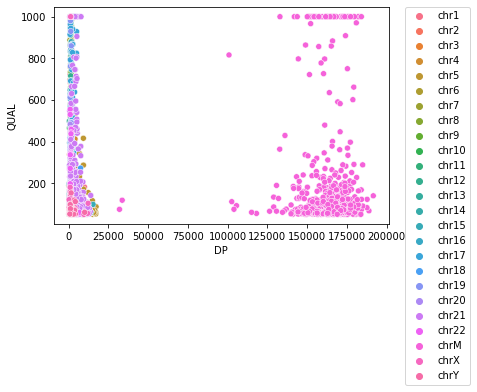

In [16]:
sns.scatterplot(data=vcf_df, x="DP", y="QUAL", hue="#CHROM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Drop MT

In [17]:
vcf_df = vcf_df.loc[(vcf_df["#CHROM"]!="chrM")]

## Scatter QUAL and Depth

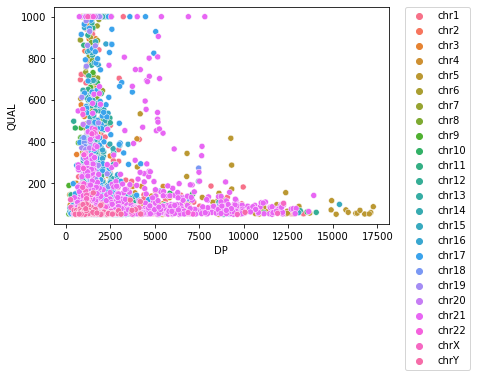

In [18]:
sns.scatterplot(data=vcf_df, x="DP", y="QUAL", hue="#CHROM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### log 10

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


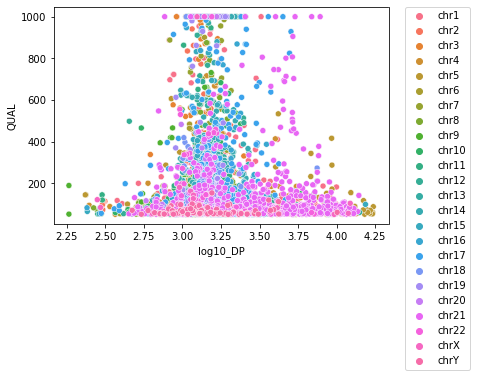

In [19]:
vcf_df["log10_DP"] = np.log10(vcf_df["DP"])
sns.scatterplot(data=vcf_df, x="log10_DP", y="QUAL", hue="#CHROM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

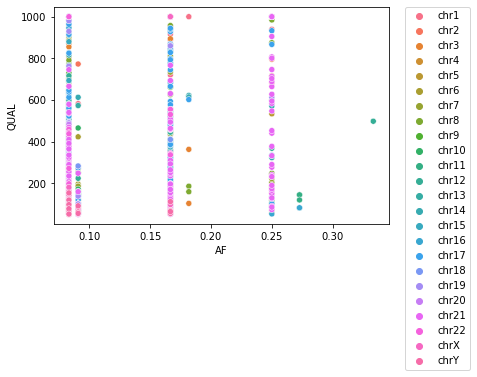

In [20]:
sns.scatterplot(data=vcf_df, x="AF", y="QUAL", hue="#CHROM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

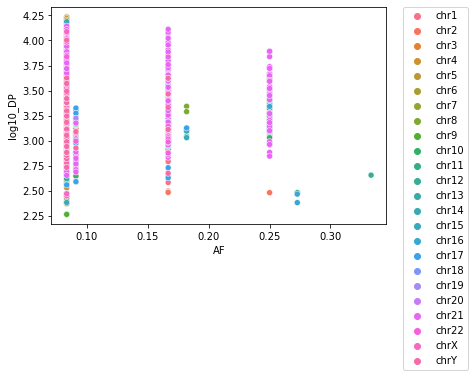

In [21]:
sns.scatterplot(data=vcf_df, x="AF", y="log10_DP", hue="#CHROM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TYPE', ylabel='count'>

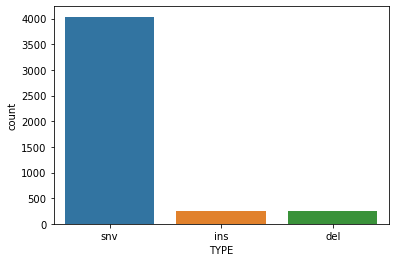

In [22]:
sns.countplot(vcf_df["TYPE"])

(array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

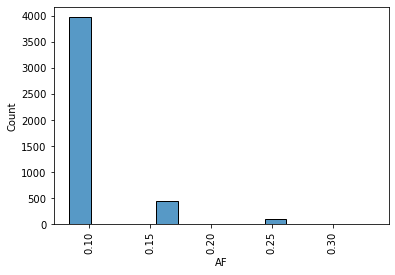

In [23]:
sns.histplot(vcf_df["AF"])
plt.xticks(rotation=90)